In [ ]:
import os
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Mengakses google drive ke dalam google colaboratory

from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


# **Subset DataFrame**

In [ ]:
df_final = pd.read_csv('/content/gdrive/Shareddrives/rekdat/gacoan.csv')
df_final.head()

,Unnamed: 0,rate,time,text,cabang,days_ago,created
0,0,5,3 minggu lalu,cabang cabang harga murah enak dimsumnya enak ...,tamansiswa,21,2021-11-07
1,1,4,2 bulan lalu,belinya grabfood memanfaatkan promo gacoannya ...,tamansiswa,60,2021-09-29
2,2,5,4 minggu lalu,luas makanan enak kesukaan anak muda dine in h...,tamansiswa,28,2021-10-31
3,3,3,sebulan lalu,mienya enak minumannya mesin kas register kasi...,tamansiswa,30,2021-10-29
4,4,5,4 bulan lalu,beli online gofood harganya terjangkau banget ...,tamansiswa,120,2021-07-31


In [ ]:
df_final = df_final[["rate","created","text","cabang"]]

In [ ]:
df_final.head()

,rate,created,text,cabang
0,5,2021-11-07,cabang cabang harga murah enak dimsumnya enak ...,tamansiswa
1,4,2021-09-29,belinya grabfood memanfaatkan promo gacoannya ...,tamansiswa
2,5,2021-10-31,luas makanan enak kesukaan anak muda dine in h...,tamansiswa
3,3,2021-10-29,mienya enak minumannya mesin kas register kasi...,tamansiswa
4,5,2021-07-31,beli online gofood harganya terjangkau banget ...,tamansiswa


In [ ]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3630 entries, 0 to 3629
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   rate     3630 non-null   int64 
 1   created  3630 non-null   object
 2   text     3317 non-null   object
 3   cabang   3630 non-null   object
dtypes: int64(1), object(3)
memory usage: 113.6+ KB


In [ ]:
my_dpi = 960

# **Persebaran Bintang**

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

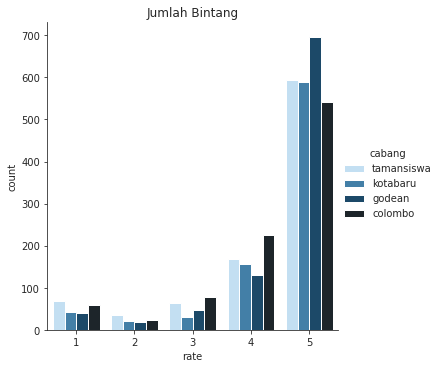

In [ ]:
sns.set_style('ticks')
sns.catplot(x="rate",data=df_final,kind="count",hue='cabang',palette=['#BBE1FA','#3282B8','#0F4C75','#1B262C'])
plt.title("Jumlah Bintang")
plt.savefig('persebaran_bintang.png', dpi=my_dpi)
plt.show()

# **Rerata Rate tiap Kata**

In [ ]:
clean_df = df_final[df_final['text'].notnull()] #only review with text review
clean_df.reset_index(drop=True, inplace=True)
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3317 entries, 0 to 3316
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   rate     3317 non-null   int64 
 1   created  3317 non-null   object
 2   text     3317 non-null   object
 3   cabang   3317 non-null   object
dtypes: int64(1), object(3)
memory usage: 103.8+ KB


In [ ]:
total_mean = clean_df["rate"].mean()
print(total_mean)

4.363883026831474


Kata-kata berkaitan dengan menu

In [ ]:
keju=pd.DataFrame(clean_df[clean_df["text"].str.contains("keju")][["text","rate"]])
keju_mean = keju['rate'].mean()
print(keju_mean)

4.621621621621622


In [ ]:
udang=pd.DataFrame(clean_df[clean_df["text"].str.contains("udang")][["text","rate"]])
udang_mean = udang['rate'].mean()

In [ ]:
mie=pd.DataFrame(clean_df[clean_df["text"].str.contains("mie")][["text","rate"]])
mie_mean = mie['rate'].mean()

In [ ]:
pedas=pd.DataFrame(clean_df[clean_df["text"].str.contains("pedas")][["text","rate"]])
pedas_mean = pedas['rate'].mean()

Kata-kata berkaitan dengan pelayanan

In [ ]:
nunggu=pd.DataFrame(clean_df[clean_df["text"].str.contains("nunggu")][["text","rate"]])
nunggu_mean = nunggu['rate'].mean()

In [ ]:
antre=pd.DataFrame(clean_df[clean_df["text"].str.contains("antre")][["text","rate"]])
antre_mean = antre['rate'].mean()

In [ ]:
lama=pd.DataFrame(clean_df[clean_df["text"].str.contains("lama")][["text","rate"]])
lama_mean = lama['rate'].mean()

In [ ]:
kasir=pd.DataFrame(clean_df[clean_df["text"].str.contains("kasir")][["text","rate"]])
kasir_mean = kasir['rate'].mean()

In [ ]:
list_mean = [udang_mean, keju_mean, pedas_mean, mie_mean, total_mean, antre_mean, nunggu_mean, kasir_mean, lama_mean]
list_mean

[4.627118644067797,
 4.621621621621622,
 4.60573476702509,
 4.450859950859951,
 4.363883026831474,
 4.022779043280182,
 3.3734939759036147,
 3.034782608695652,
 2.9545454545454546]

In [ ]:
list_word = ['udang', 'keju', 'pedas', 'mie', '[TOTAL]', 'antri', 'nunggu', 'kasir', 'lama']

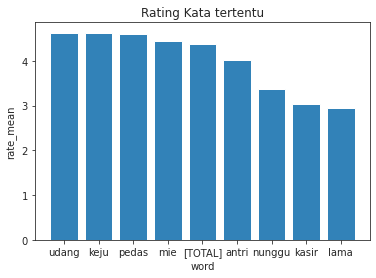

In [ ]:
plt.bar(list_word, list_mean, color ='#3282B8')
plt.xlabel('word')
plt.ylabel('rate_mean')
plt.title('Rating Kata tertentu')
plt.savefig('words.png', dpi=my_dpi)

plt.show()

# **Word Cloud**

In [ ]:
strings = '' #concat all review text
for i in range(len(clean_df)):
  strings = strings + ' ' + clean_df['text'][i]

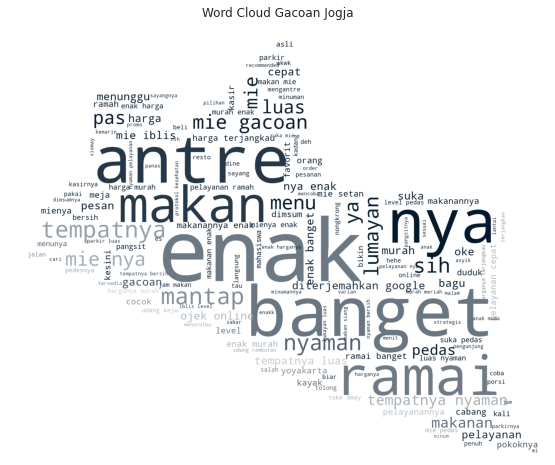

In [ ]:
from PIL import Image
from wordcloud import ImageColorGenerator,WordCloud

#Create the mask
jogja_mask = np.array(Image.open('/content/gdrive/Shareddrives/rekdat/jogja.jpg'))

#Grab the mask colors
colors = ImageColorGenerator(jogja_mask)

#Instantiate the wordcloud using color_func argument
cloud = WordCloud(mask=jogja_mask,
                  scale=4,
                  background_color='white',
                  width = 1600,
                  height = 800,
                  color_func=colors).generate_from_text(strings)

#Plot the wordcloud
plt.figure(figsize=(10,8))
plt.imshow(cloud)
plt.axis('off')
plt.title("Word Cloud Gacoan Jogja")
plt.savefig('gacoan.png', dpi=my_dpi)
plt.show()

# **Time Series**

In [ ]:
df_final['created'] = pd.to_datetime(df_final['created'])

In [ ]:
df_final.groupby(df_final['created'].dt.strftime('%B'))['rate'].mean().sort_values()

created
September    4.040486
July         4.264069
June         4.316327
May          4.352941
January      4.392638
August       4.393064
November     4.398502
October      4.416031
April        4.542056
March        4.549223
February     4.613260
Name: rate, dtype: float64

In [ ]:
df_trial=df_final.copy()
# df_trial['created'] = pd.to_datetime(df_trial['created']) - pd.to_timedelta(7, unit='d')
# df_trial = df_trial.groupby([pd.Grouper(key='created', freq='W-MON')])['rate'].mean().reset_index().sort_values('created')

In [ ]:
df_trial.dropna(axis=0,inplace=True)

In [ ]:
df_trial=df_trial[df_trial["created"] >= "2021-01-01"]
df_trial

,rate,created,text,cabang
0,5,2021-11-07,cabang cabang harga murah enak dimsumnya enak ...,tamansiswa
1,4,2021-09-29,belinya grabfood memanfaatkan promo gacoannya ...,tamansiswa
2,5,2021-10-31,luas makanan enak kesukaan anak muda dine in h...,tamansiswa
3,3,2021-10-29,mienya enak minumannya mesin kas register kasi...,tamansiswa
4,5,2021-07-31,beli online gofood harganya terjangkau banget ...,tamansiswa
...,...,...,...,...
3593,5,2021-04-02,makanan enak harga terjangkau,colombo
3597,5,2021-04-02,suka menunya,colombo
3617,5,2021-06-01,mantap,colombo
3620,5,2021-06-01,cepat,colombo


Text(0.5, 1.0, 'Google Review Mie Gacoan sejak Januari 2021')

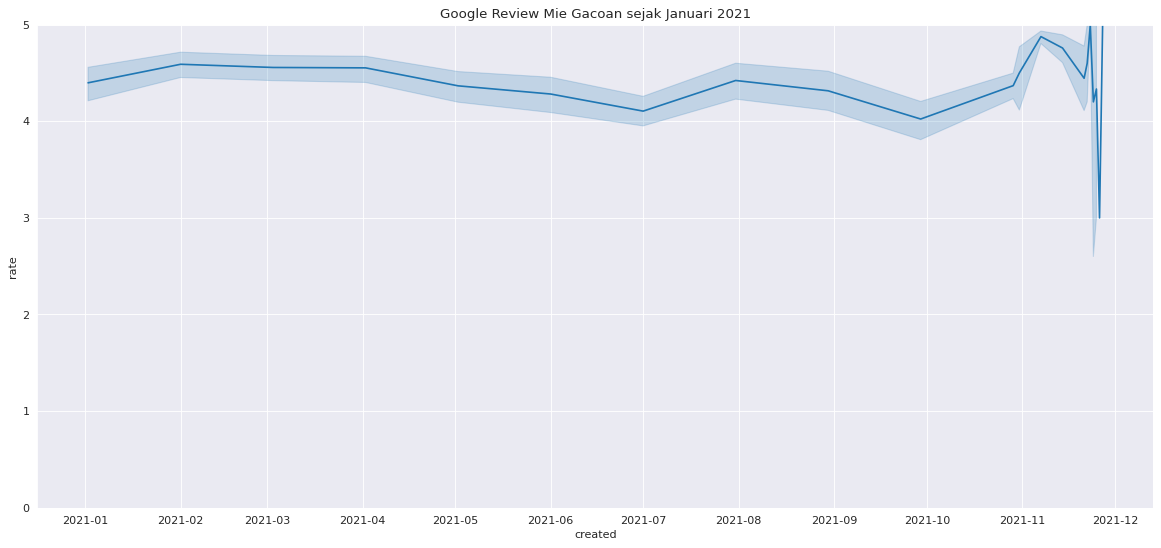

In [ ]:
# fig, ax = plt.subplots(figsize=(18,6))
sns.set_style("darkgrid")
fig=plt.figure(figsize=(18, 8), dpi=80)
ax = sns.lineplot(x="created", y="rate", data=df_trial,palette=sns.cubehelix_palette(n_colors=10, reverse=True,start=6, rot=.2))
ax.set_ylim([0,5])
ax.set_title("Google Review Mie Gacoan sejak Januari 2021")
# ax.set_xlim(["2021-02","2021-11"])
# ax.set_xlim(left,right)
# plt.ylim([0,1])
# plt.show()

In [ ]:
df_nov=df_trial[df_trial["created"] >= "2021-11-01"]
df_nov

,rate,created,text,cabang
0,5,2021-11-07,cabang cabang harga murah enak dimsumnya enak ...,tamansiswa
5,5,2021-11-21,harga standar antre pengap hawa makannya,tamansiswa
8,5,2021-11-14,makanan enak pangsit mie oke suka harganya mur...,tamansiswa
11,5,2021-11-14,berkunjung yoyakarta urusan pekerjaan seminggu...,tamansiswa
16,5,2021-11-21,nya nyaman area outdoornya live musik nya bamy...,tamansiswa
...,...,...,...,...
3170,5,2021-11-07,ramai menagih,colombo
3221,5,2021-11-07,alhamdulillah puas pelayanan,colombo
3271,5,2021-11-07,memuaskan,colombo
3273,5,2021-11-07,mantap,colombo


In [ ]:
df_per_nov=df_nov.groupby(["created","cabang"])["rate"].mean().reset_index().sort_values("created")
df_per_nov

,created,cabang,rate
0,2021-11-07,colombo,5.000000
1,2021-11-07,godean,4.897059
2,2021-11-07,kotabaru,4.823529
3,2021-11-07,tamansiswa,4.811594
4,2021-11-14,colombo,4.750000
5,2021-11-14,godean,4.739130
6,2021-11-14,kotabaru,4.750000
7,2021-11-14,tamansiswa,4.777778
8,2021-11-21,colombo,4.750000
9,2021-11-21,godean,4.250000


Text(0.5, 1.03, 'Google Review Mie Gacoan sejak November 2021')

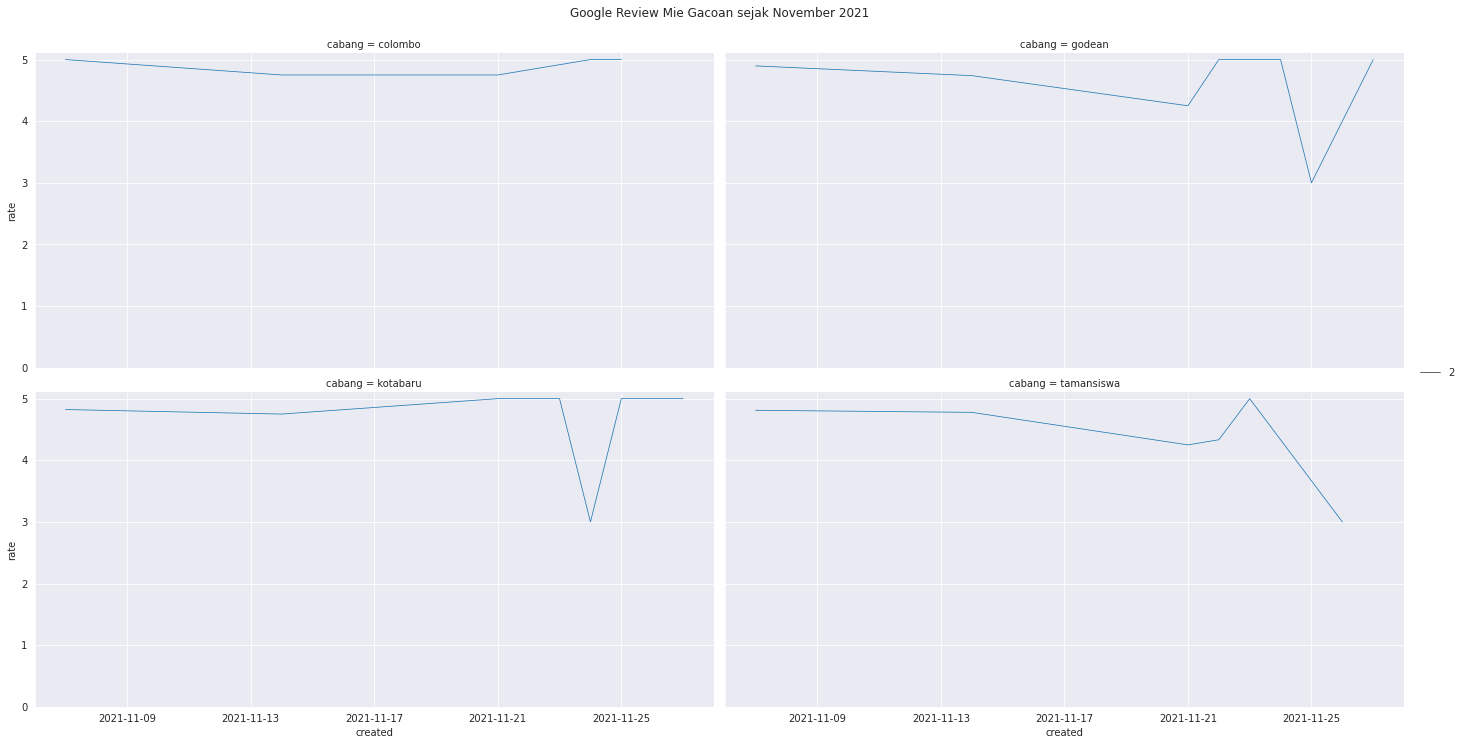

In [ ]:
sns.set_style("darkgrid")
# fig=plt.figure(figsize=(18, 8), dpi=80)
ax = sns.relplot(x="created", y="rate", data=df_per_nov,col='cabang',kind="line",col_wrap=2,size=2, aspect=2)
ax.set(ylim=(0, None))
ax.fig.suptitle("Google Review Mie Gacoan sejak November 2021",y=1.03)
# ax.set_xticklabels(np.arange(21), [""])
# xticks(np.arange(3), ['Tom', 'Dick', 'Sue'])
# ax.set_ylim([0,5.3])
# ax.set_title("Google Review Mie Gacoan sejak awal November 2021")